# Explore channel ratio in channel space using napari-brainbow-diagnose

In [1]:
import napari
from napari_brainbow_diagnose import fetch_chroms_data
from napari_brainbow_diagnose import DiagnoseWidget

In [2]:

bb = fetch_chroms_data()
viewer = napari.Viewer()

red_layer = viewer.add_image(bb[:,0], name="red", colormap='red', blending='additive')
green_layer = viewer.add_image(bb[:,1], name="green", colormap='green', blending='additive')
blue_layer = viewer.add_image(bb[:,2], name="blue", colormap='blue', blending='additive')


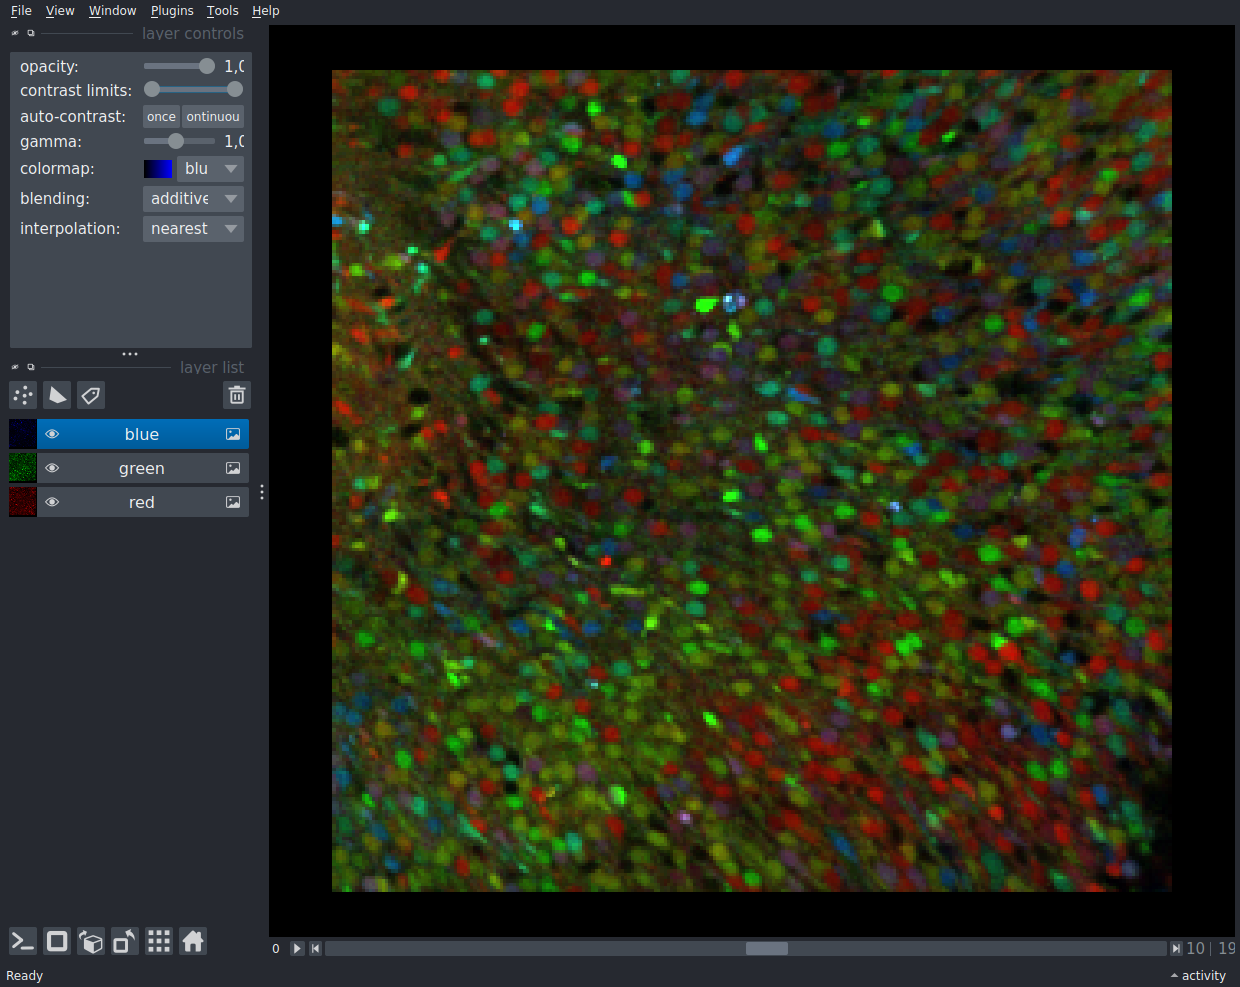

In [3]:
napari.utils.nbscreenshot(viewer)

In [4]:
wdg = DiagnoseWidget(viewer)
viewer.window.add_dock_widget(wdg)

wdg.brainbow_layers_selector.red_layer.value = red_layer
wdg.brainbow_layers_selector.green_layer.value = green_layer
wdg.brainbow_layers_selector.blue_layer.value = blue_layer


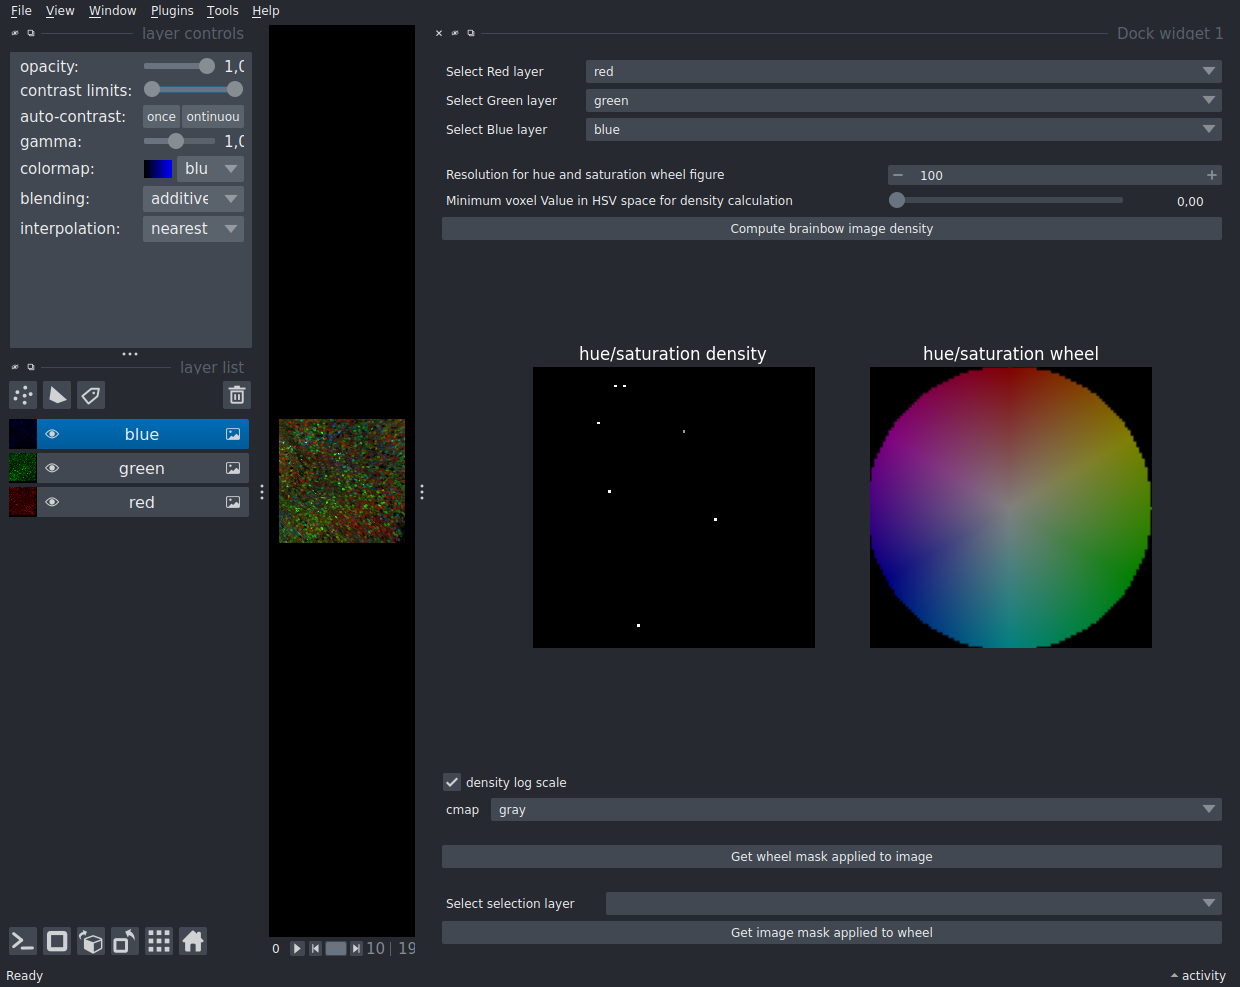

In [5]:
napari.utils.nbscreenshot(viewer)


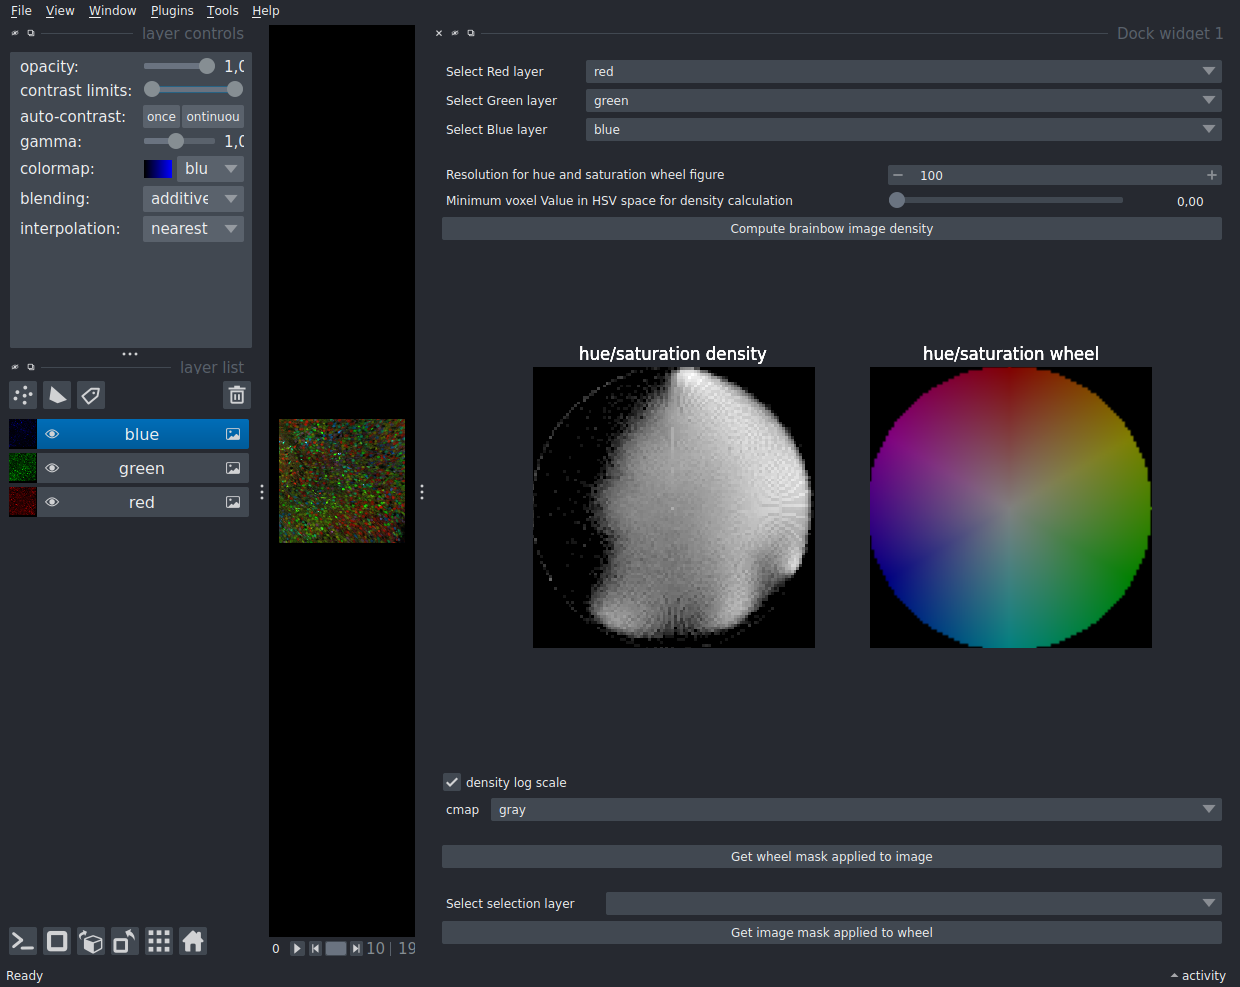

In [6]:
wdg.update_density_wheel()
napari.utils.nbscreenshot(viewer)

In [7]:
wdg.density_figure_parameters.cmap.value = 'viridis'

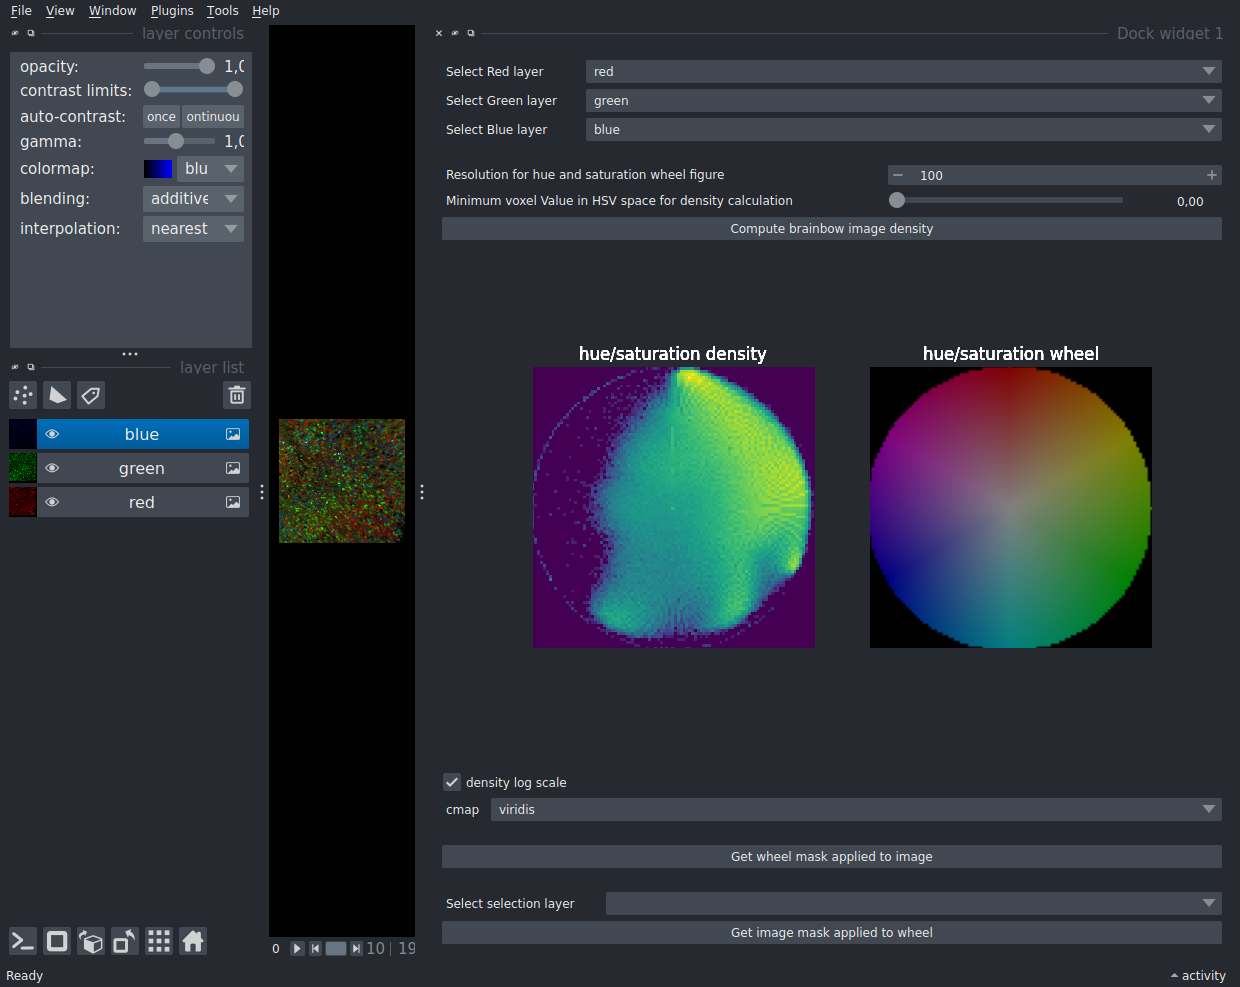

In [8]:
wdg.update_density_wheel()
napari.utils.nbscreenshot(viewer)

In [9]:
import numpy as np

one_cell_mask = (
    [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10],
    [61, 61, 61, 62, 62, 62, 62, 62, 63, 63, 63, 63, 63, 64, 64, 64, 64,
        64, 65, 65, 65],
    [76, 77, 78, 75, 76, 77, 78, 79, 75, 76, 77, 78, 79, 75, 76, 77, 78,
        79, 76, 77, 78]
) # arbitrary mask corresponding to one cell on the brainbow image as example


labels = np.zeros_like(bb[:,0])
labels[one_cell_mask] = 1
labels = viewer.add_labels(labels, name="one cell labels")

# update the mask on the wheel

wdg.image_mask_to_wheel.selection_mask.value = labels
wdg.create_mask_on_wheel()

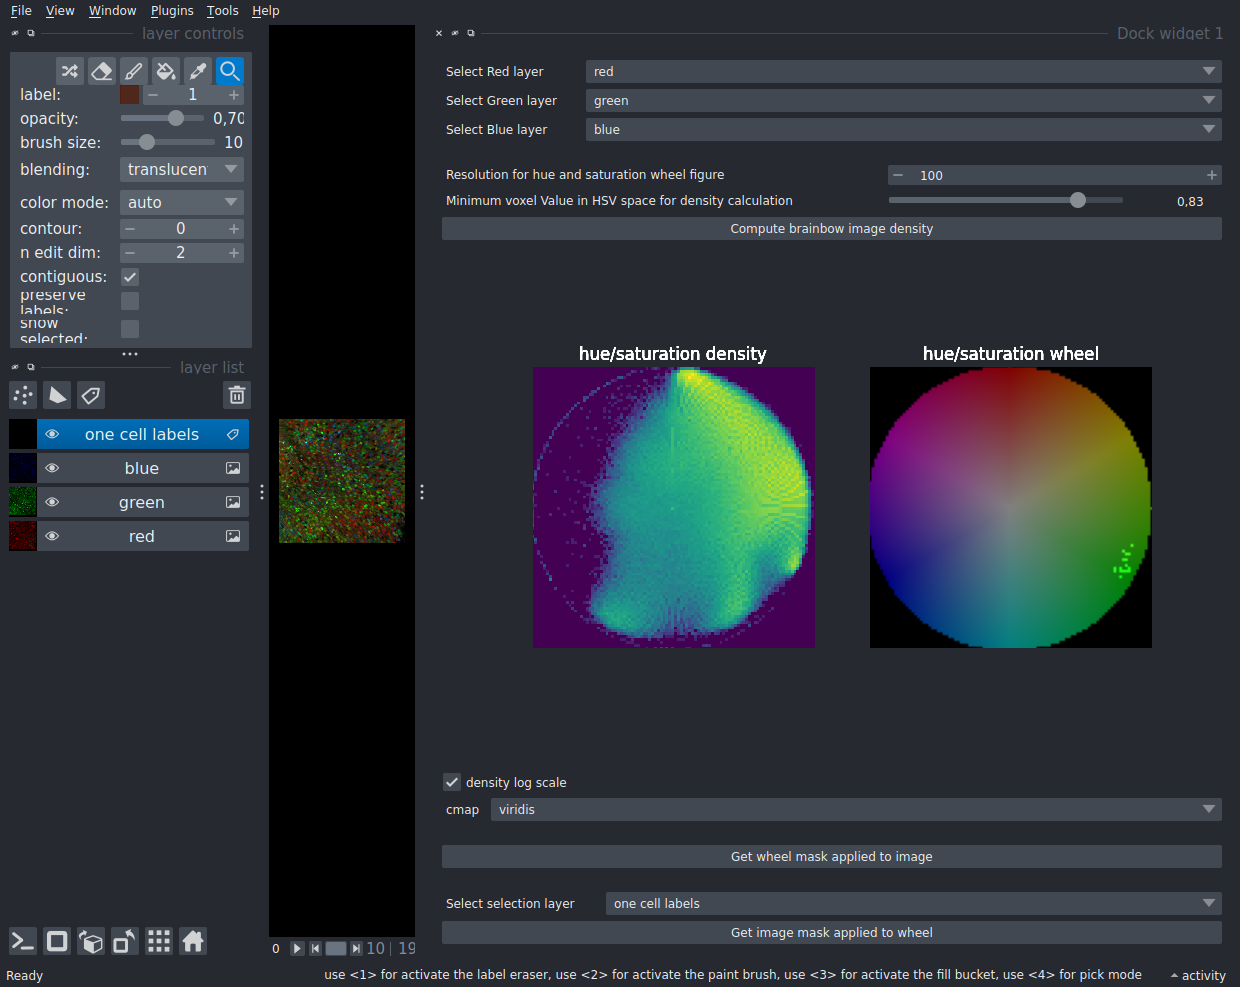

In [10]:
# bright pixel on the saturation wheel indicates that the selected cell has green ratio

napari.utils.nbscreenshot(viewer)

In [11]:
# You can also draw a mask on the wheel and get the corresponding mask on the image
# here we take the same ratio as the one cell labels.

# Take time to draw a mask on the wheel using the lasso tool to select cell with green ratio.

wdg.create_mask_on_image()

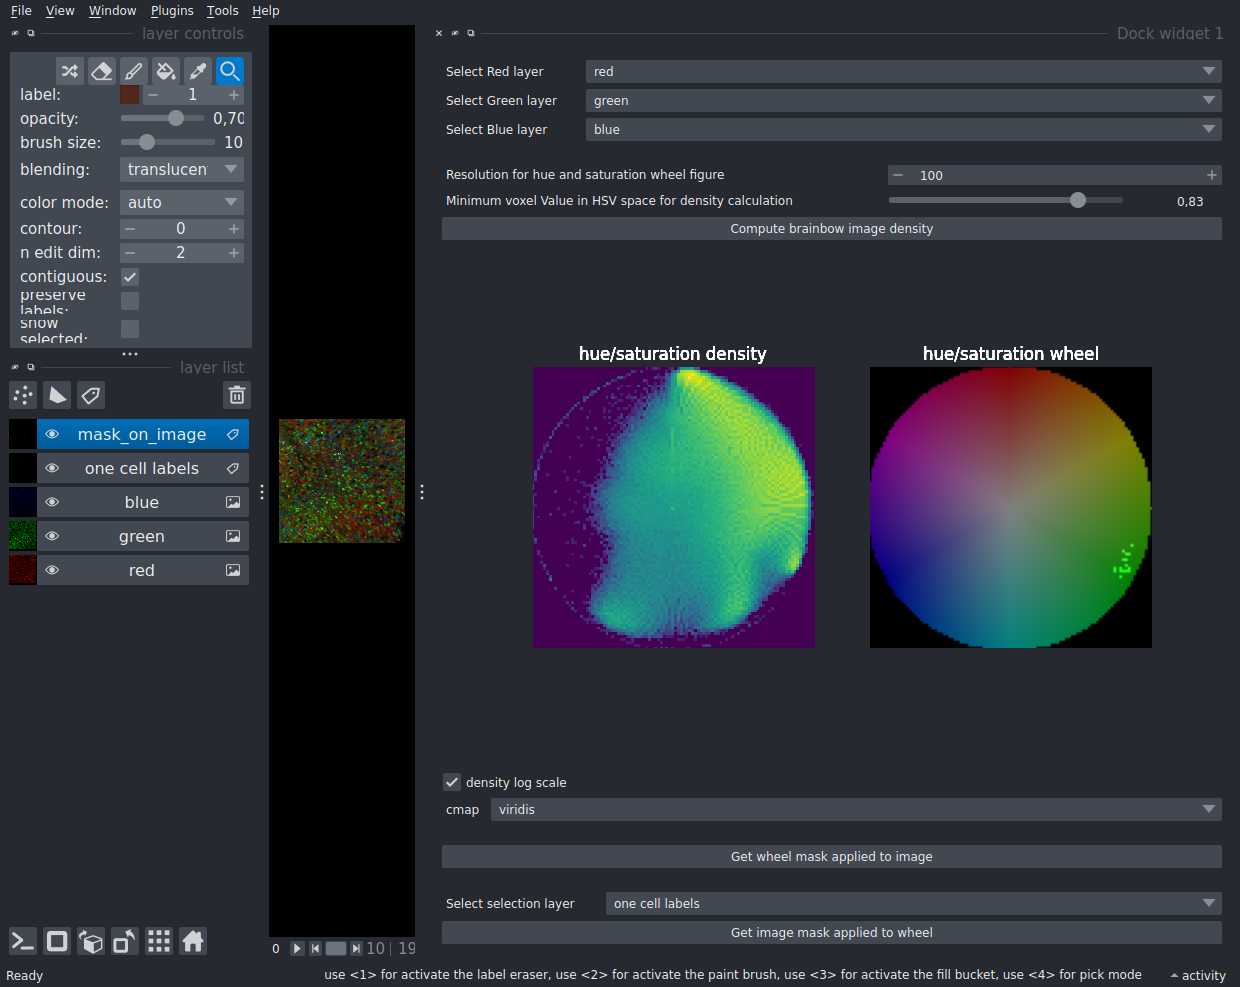

In [12]:
napari.utils.nbscreenshot(viewer)

When region in the image have a low intensity in all the channel, the noise can create artefact on the density map ([10, 0, 0] will appear on the circle border. a lot of noise will induces a complete circle on the edge of the density map) . You can remove them using the "value threshold". It prevents the empty part of the image to flood the density. Beware that if you put this threshold too high you will loose dim ratios. (For example in this image the magenta.)

In [13]:
wdg.density_resolution_widget.value_threshold.value = 0.2
wdg.update_density_wheel()

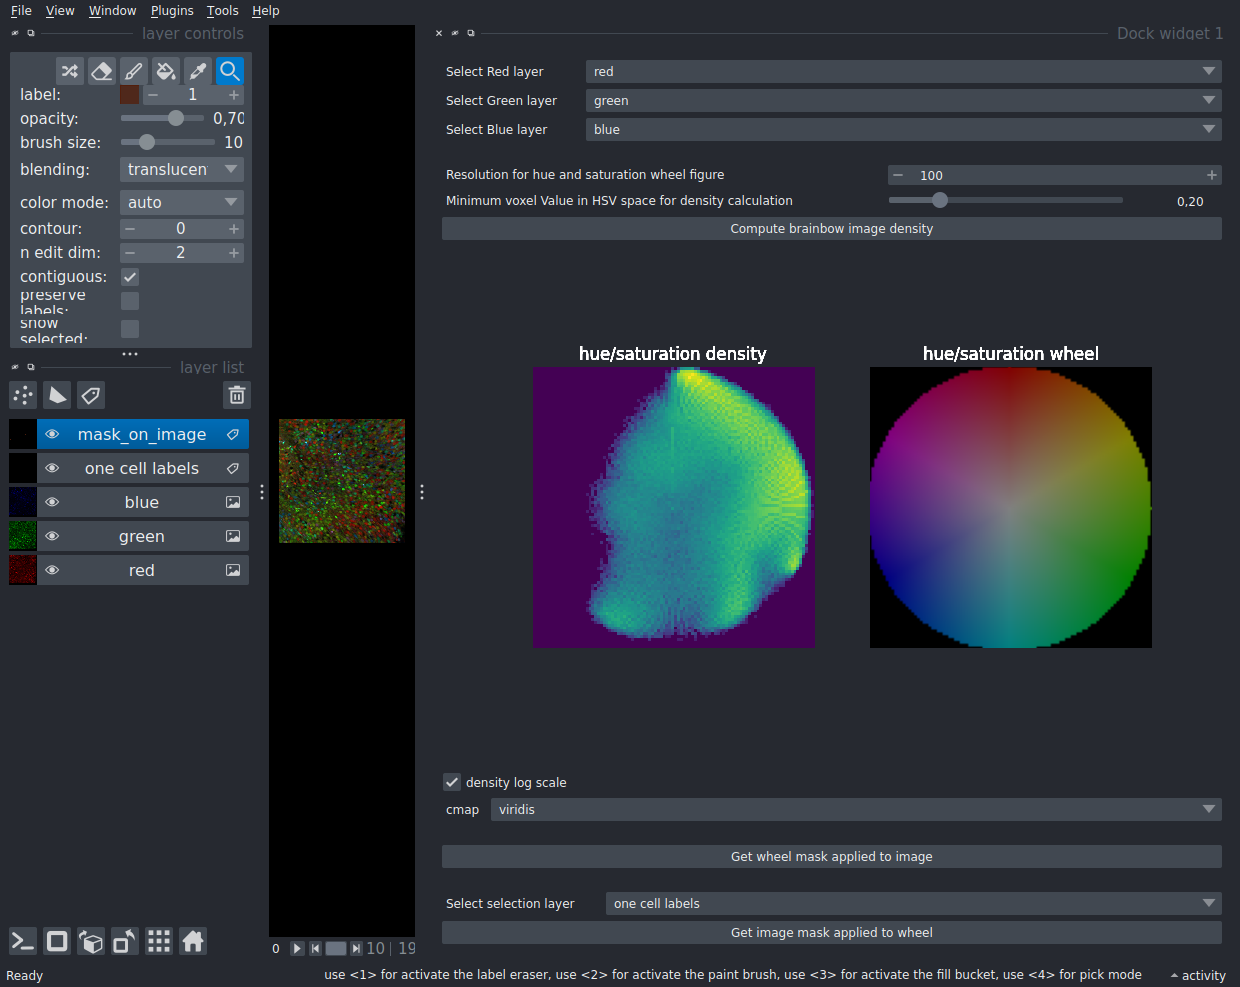

In [14]:
napari.utils.nbscreenshot(viewer)